In [7]:
import os
ROOT_DIR = './'
DIR_DATA_RAW = os.path.join(ROOT_DIR, 'data', 'raw')
DIR_DATA_INTERIM = os.path.join(ROOT_DIR, 'data', 'interim')
DIR_DATA_PROCESSED = os.path.join(ROOT_DIR, 'data', 'processed')
DIR_DATA_EXTERNAL = os.path.join(ROOT_DIR, 'data', 'external')

DIR_DATA_LINES_KHALIL = os.path.join(DIR_DATA_INTERIM, 'LINES KHALIL')

NAME_FILE_KHALIL = 'code_musulman_par_khalil.pdf'
FILE_DATA_RAW_KHALIL = os.path.join(DIR_DATA_RAW, NAME_FILE_KHALIL)
DIR_KHALIL_JPG = os.path.join(DIR_DATA_INTERIM, 'Khalil_jpg')
DIR_KHALIL_PPM = os.path.join(DIR_DATA_INTERIM, 'Khalil_ppm')
NAME_FILE_EXEMPLE = 'exemple.PNG'
FILE_DATA_EXEMPLE = os.path.join(DIR_DATA_INTERIM, NAME_FILE_EXEMPLE)


In [8]:
import cv2
import numpy as np
import os


img = cv2.imread(FILE_DATA_EXEMPLE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]

    # show ROI
    path_name = os.path.join(DIR_DATA_LINES_KHALIL, 'segment_no_'+str(i)+'_expl.jpg')
    cv2.imwrite(path_name, roi)


In [11]:
import matplotlib.pyplot as plt

In [214]:
SEGMENTED_FILE = 'data/interim/LINES KHALIL/segment_no_6_expl.jpg'
image_proportion = cv2.imread(SEGMENTED_FILE)
image_proportion = cv2.cvtColor(image_proportion, cv2.COLOR_RGB2GRAY)

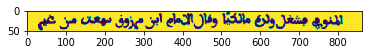

In [215]:
plt.imshow(image_proportion)

In [216]:
hist = 255-image_proportion.mean(axis=0)
interruption = hist > 20

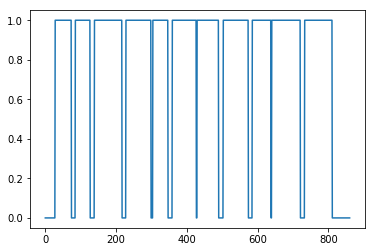

In [217]:
plt.plot(interruption)

In [218]:
mask = image_proportion * interruption

In [219]:
fg = cv2.bitwise_or(image_proportion, image_proportion, mask=mask)

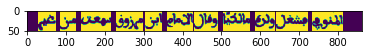

In [220]:
plt.imshow(fg)

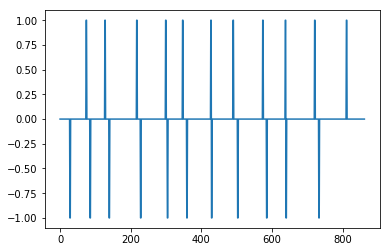

In [222]:
filter = np.array([-1, 0, 1])
conv = np.convolve(interruption, filter)
plt.plot(conv)